# Introduction 

**Overview**

This Exploratory Data Analysis (EDA) is dedicated to an in-depth examination of the DataKind DataKit—a comprehensive, free, and open-source toolkit designed to empower communities and organizations addressing critical social challenges. The DataKit offers:

- **Community-Driven Social Impact Questions**: Curated inquiries sourced directly from communities that require data-driven insights, technological solutions, and compelling storytelling to tackle pressing social issues.
  
- **Expert-Validated Datasets**: A robust collection of meticulously vetted datasets, providing a solid foundation for meaningful analysis and actionable insights.
  
- **Comprehensive Housing Data**: High-quality, accessible housing data available at national, state, and local levels, ensuring a nuanced understanding of housing dynamics across various regions.

**Goals**

This notebook serves as my contribution to the collective effort aimed at generating impactful insights and developing tools to protect tenants from excessive rent increases and prevent arbitrary evictions. By leveraging the resources within the DataKit, this project seeks to address the following four pivotal challenges:

1. **Challenge 1: Understanding Housing Inventory**
   - **Objective**: Analyze the current housing dataset to determine availabile metrics, types, and distribution of within geographical regions.
   - **Impact**: Provides a clear picture of insights, helping to identify gaps and areas of interest.

2. **Challenge 2: Anticipating Household Displacement in Communities**
   - **Objective**: Predict potential areas and populations at risk of displacement due to economic, environmental, or policy-driven factors.
   - **Impact**: Enables proactive measures to protect vulnerable populations and maintain community stability.

3. **Challenge 3: Planning for New Housing Development**
   - **Objective**: Facilitate informed decision-making for future housing projects by assessing community needs, zoning regulations, and market trends.
   - **Impact**: Supports the creation of sustainable and equitable housing solutions that align with community growth and demand.

4. **Challenge 4: Developing Post-Disaster Housing Response**
   - **Objective**: Create strategies for rapid and efficient housing recovery in the aftermath of natural or man-made disasters.
   - **Impact**: Enhances resilience and ensures timely support for affected populations, minimizing long-term displacement and hardship.

Through addressing these challenges, this EDA aims to contribute valuable insights and practical tools that foster equitable housing solutions, safeguard tenant rights, and promote community resilience.

A preliminary exploration of the Florida state data obtained from EODataScape using pandas and visualization libraries.

In [2]:
#import statements
import pandas as pd
import numpy as np

#visualizations
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt



### Exploring EODataScape CALIFORNIA Data

This is a simple examination of the csv file downloaded from https://eodatascape.datakind.org/explore-data filtered for the state of California. The specific data features selected can be seen below. The dataframe was transposed to easily identify all features selected, and the data points, in the following case, are shown at the column level.

In [5]:
#importing data from a download from the datakind pipeline https://eodatascape.datakind.org/explore-data
df = pd.read_csv('data_ca.csv')
df.head(5).T

,0,1,2,3,4
geoid,6001400200,6001400600,6001401400,6001401600,6001401700
geoid_year,2020,2020,2020,2020,2020
state,California,California,California,California,California
county,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County
state_fips_code,6,6,6,6,6
...,...,...,...,...,...
underground_tanks_pctile,89.0,66.0,95.0,98.0,93.0
air_toxics_resp_ej_pctile,40.0,56.0,72.0,71.0,62.0
air_toxics_resp_pctile,31.0,31.0,31.0,31.0,31.0
toxic_releases_ej_pctile,41.0,65.0,80.0,79.0,69.0


In [43]:
df.shape

(2268, 274)

### The data succesfully loaded from the download. Let's first perform a quick sanity check.
The main purpose of this sanity check to to ensure that only data from the selected state has been recorded.

In [7]:
print('')
print('The total number of rows in our table is: ', df.shape[0])
print('The total number of columns in our table is: ', df.shape[1])
print('')
print('-' * 75)
print('')
unique_states = df['state'].unique()
unique_years = df['geoid_year'].unique()
print('The target state is: ', unique_states)
print('')
print('=' * 75)
print('')
print('The number of STATE rows with missing data is: ', df['state'].isnull().sum())
print('The total number of COUNTIES observed is: ', df['county'].nunique())
print('The number of COUNTIES rows with missing data is: ', df['county'].isnull().sum())
print('')
print('=' * 75)
print('')
print('The date range for this data covers the following year(s): ' ,unique_years)
print('')


The total number of rows in our table is:  2268
The total number of columns in our table is:  274

---------------------------------------------------------------------------

The target state is:  [' California']


The number of STATE rows with missing data is:  0
The total number of COUNTIES observed is:  53
The number of COUNTIES rows with missing data is:  0


The date range for this data covers the following year(s):  [2020]



We confirmed that:
 - Florida is the only state within the data set
 - There are ONLY 53 counties in total in the data set, which DOES NOT aligns with US Censue  results of 58 COUNTIES: https://www.census.gov/geographies/reference-files/2010/geo/state-local-geo-guides-2010/california.html
 - The STATE and COUNTY columns have 0 NaN data

To display the df.info output, expand the below:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Columns: 274 entries, geoid to toxic_releases_pctile
dtypes: float64(216), int64(54), object(4)
memory usage: 4.7+ MB


The below code identified the following features using text:
- state
- county
- cdfi_fund_invest_areas


In [71]:
# run below code if you wish to see output
# pd.set_option('display.max_rows', None)
# print(df.dtypes)

In [73]:
#reseting code to default row display
pd.reset_option('display.max_rows')

To display the df.describe statistical output, expand below:

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
geoid,2268.0,6.054734e+09,2.585741e+07,6.001400e+09,6.037238e+09,6.059074e+09,6.073015e+09,6.111006e+09
geoid_year,2268.0,2.020000e+03,0.000000e+00,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
state_fips_code,2268.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
county_fips_code,2268.0,5.453792e+01,2.592504e+01,1.000000e+00,3.700000e+01,5.900000e+01,7.300000e+01,1.110000e+02
hud_opportunity_zones,2268.0,1.027337e-01,3.036777e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
underground_tanks_pctile,2263.0,2.124083e+01,3.131797e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,9.900000e+01
air_toxics_resp_ej_pctile,2268.0,6.334127e+01,2.642324e+01,0.000000e+00,4.500000e+01,6.800000e+01,8.600000e+01,9.900000e+01
air_toxics_resp_pctile,2259.0,4.511996e+01,2.916050e+01,0.000000e+00,3.100000e+01,3.100000e+01,6.900000e+01,9.200000e+01
toxic_releases_ej_pctile,2262.0,4.960920e+01,3.003086e+01,0.000000e+00,2.200000e+01,5.100000e+01,7.800000e+01,9.900000e+01


## Missing Data Check

In [26]:
# checking to see if any features are missing columns
df.columns[df.isnull().any()]

Index(['energy_burden', 'exp_build_loss_rate', 'exp_pop_loss_rate',
       'fire_risk_30yr_share', 'flood_risk_30yr_share', 'air_toxics_cancer',
       'diesel_pm', 'traffic_prox_ej', 'traffic_prox', 'med_property_value',
       'num_mortgage_loans', 'num_mortgage_denials', 'num_mortgages_origin',
       'num_sba_504_loans', 'num_sba_7a_loans', 'total_cdfi_lending',
       'med_mortgage_loan', 'med_sba_504_loan', 'med_sba_7a_loan',
       'wastewater_ej', 'wastewater', 'underground_tanks_ej',
       'underground_tanks', 'air_toxics_cancer_pctile',
       'traffic_prox_ej_pctile', 'traffic_prox_pctile', 'wastewater_ej_pctile',
       'wastewater_pctile', 'underground_tanks_ej_pctile',
       'underground_tanks_pctile', 'air_toxics_resp_pctile',
       'toxic_releases_ej_pctile', 'toxic_releases_pctile'],
      dtype='object')

We see that we have a number of features missing data. We need to explore if the number of missing data elements can statistically impact any of our analysis.

In [33]:
import pandas as pd

# Function to get insights on the missing data 
def missing_data_summary(df):
    # Calculate missing data count
    missing_count = df.isna().sum()
    
    # Calculate missing data percentage
    missing_percentage = (missing_count / len(df)) * 100
    
    # New DataFrame with the missing data count and percentage
    missing_summary = pd.DataFrame({
        'Missing Data Count': missing_count,
        'Missing Data Percentage': missing_percentage
    })
    
    # Filter out columns with no missing data
    missing_summary = missing_summary[missing_summary['Missing Data Count'] > 0]
    
    # Sort by the highest percentage of missing data
    missing_summary = missing_summary.sort_values(by='Missing Data Percentage', ascending=False)
    
    return missing_summary

# Example usage
missing_summary_df = missing_data_summary(df)
missing_summary_df


,Missing Data Count,Missing Data Percentage
med_sba_504_loan,1116,49.206349
num_sba_504_loans,1116,49.206349
med_sba_7a_loan,570,25.132275
num_sba_7a_loans,570,25.132275
total_cdfi_lending,143,6.305115
wastewater_ej,125,5.511464
wastewater_pctile,125,5.511464
wastewater_ej_pctile,125,5.511464
wastewater,125,5.511464
med_property_value,31,1.366843


### Missing Data Impact

The features that are impacted the most due to missing data are: 
- SBA 504 Loan - Small Business Loan (49%)
- SBA 7(a) Loan - Small Business Loan (25%)
- CDFI Lending - Community Development Financial Institution Lending (6%)
- Wastwater EJ - Wastewate Environmental Justice (5.5%)

When performing any analysis on these features, we will need to be aware of this and plan accordingly. The remaining features missing data is expected to have less of an impact.

### '0' Value Data

We should also check to see are there any columns that currently uses the value '0'

In [56]:
# find columns that contains value of '0'
columns_with_zeros = df.columns[(df==0).any()]
print(columns_with_zeros)

Index(['hud_opportunity_zones', 'energy_burden', 'energy_burden_pctile',
       'exp_build_loss_rate', 'exp_build_loss_rate_pctile',
       'exp_pop_loss_rate', 'exp_pop_loss_rate_pctile', 'fire_risk_30yr_share',
       'fire_risk_30yr_pctile', 'flood_risk_30yr_share',
       ...
       'haz_waste_prox_ej_pctile', 'haz_waste_prox_pctile',
       'wastewater_ej_pctile', 'wastewater_pctile',
       'underground_tanks_ej_pctile', 'underground_tanks_pctile',
       'air_toxics_resp_ej_pctile', 'air_toxics_resp_pctile',
       'toxic_releases_ej_pctile', 'toxic_releases_pctile'],
      dtype='object', length=121)


In [60]:
# we see from above that we have a quite a few columns that were identified. To better understand, we will now count how many were identified.
column_list = columns_with_zeros.tolist()
print(f'There are {len(column_list)} columns with zero values')

There are 121 columns with zero values


## Interpreting JAM Values as N/A vs NaN Data Occurences

As we can see from the above, there are actual missing values in the data set. However, the data does use negative values with repeating schemes to represent 'Jam Values'.

### Understanding Jam Values

The Census Department utilizes specific negative values to represent cases where the sample is too small, non-computational entries, not applicable or not available data, as well as data being treated as zero. A detailed breakdown can be found here: https://www2.census.gov/programs-surveys/acs/tech_docs/jam_values/2022_Jam_Values.xlsx

For example, if we were to look at one feature in our dataset, med_inc_ai_an_moe, and display the output:

In [37]:
df[['med_inc_asian_est','geoid','county']].head(10).T

,0,1,2,3,4,5,6,7,8,9
med_inc_asian_est,250001,221250,-666666666,124205,139922,-666666666,-666666666,-666666666,14740,124286
geoid,6001400200,6001400600,6001401400,6001401600,6001401700,6001401800,6001402200,6001402400,6001402900,6001403302
county,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County


The feature, med_inc_asian_est, represents 
- ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - Asian - Estimate
- The value, -666666666, is used to represent that the estimate was not computed due to insufficient number of sample cases.

According to the data dictionary provided. We can see that we have a sequence of negative numbers with repeating patterns, in this case, -666666666.  In this case, it means that for the associated county/geoid, there were no Asians represented at the time the data was collected. We can estrapolate this out further to understand the diversity of specific counties and GEOID tracts as we evaluate the data.

### Managing Jam Values

The current governance of Jam values does limit how we will interpret some of the data. In some cases, we may want to replace the negative Jam values while performing statiscal or other types of analysis. One option explored was to replace the jam values with 0, HOWEVER, this is not to substitute replace the meaning of the Jam value, it is ONLY TO PERFORM ANALYTICAL MEASUREMENTS.

We do not equate the '0' replacement Jam values, with existing usages of '0' in the data set. For example. we see that the following three features, uses 0, as values:
- lihtc_qualified_tracts
- num_mortgage_denials
- num_mortgages_origin

With that in mind, we must be cognizant when to use the Jam values, and when to modify the values for analysis.

In [39]:
# the following code was used to find existing '0' value entries in the data set
zero_mask = df == 0
# find columns that has at least one zero value
columns_with_zeros = df.loc[:, zero_mask.any(axis=0)]
print(columns_with_zeros.columns)

Index(['hud_opportunity_zones', 'energy_burden', 'energy_burden_pctile',
       'exp_build_loss_rate', 'exp_build_loss_rate_pctile',
       'exp_pop_loss_rate', 'exp_pop_loss_rate_pctile', 'fire_risk_30yr_share',
       'fire_risk_30yr_pctile', 'flood_risk_30yr_share',
       ...
       'haz_waste_prox_ej_pctile', 'haz_waste_prox_pctile',
       'wastewater_ej_pctile', 'wastewater_pctile',
       'underground_tanks_ej_pctile', 'underground_tanks_pctile',
       'air_toxics_resp_ej_pctile', 'air_toxics_resp_pctile',
       'toxic_releases_ej_pctile', 'toxic_releases_pctile'],
      dtype='object', length=121)


### Managing NaN Rows and Zeroing Jam Values
In the following, let's create a subset dataframe that zeros out the NaN and Jam values. We will take this into account when performing analysis on SBA and Wastewater EJ metrics.

In [75]:
# replacing missing values with 0s
df_zeros = df.fillna('0')
# excluding my features that are objects.strings
exclude_columns = ['state', 'county','cdfi_fund_invest_areas']
numerical_df = df_zeros.select_dtypes(include=[np.number]).drop(columns=exclude_columns, errors='ignore')
# setting my Jam Values to the value of 0
numerical_df = numerical_df.clip(lower=0)
# combining back to my df_zeros df
df_zeros.loc[:, numerical_df.columns] = numerical_df
# printing 
df_zeros.head(5).T

,0,1,2,3,4
geoid,6001400200,6001400600,6001401400,6001401600,6001401700
geoid_year,2020,2020,2020,2020,2020
state,California,California,California,California,California
county,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County
state_fips_code,6,6,6,6,6
...,...,...,...,...,...
underground_tanks_pctile,89.0,66.0,95.0,98.0,93.0
air_toxics_resp_ej_pctile,40.0,56.0,72.0,71.0,62.0
air_toxics_resp_pctile,31.0,31.0,31.0,31.0,31.0
toxic_releases_ej_pctile,41.0,65.0,80.0,79.0,69.0


Sanity check to make sure no negative values are present. Expand below for results to see that there are 0 entires with negative values.

In [77]:
# checking to make sure no negative numbers remained
print(numerical_df[numerical_df < 0].sum())

geoid                          0.0
geoid_year                     0.0
state_fips_code                0.0
county_fips_code               0.0
hud_opportunity_zones          0.0
                              ... 
rmp_facility_prox_ej_pctile    0.0
rmp_facility_prox_pctile       0.0
haz_waste_prox_ej_pctile       0.0
haz_waste_prox_pctile          0.0
air_toxics_resp_ej_pctile      0.0
Length: 237, dtype: float64


In [79]:
# reconfirming size of dataframe
df_zeros.shape

(2268, 274)

# Simple Visualizations

A simple exploration of our modified data set to explore some straightforward use cases

## Income Diverity by Sex and Race

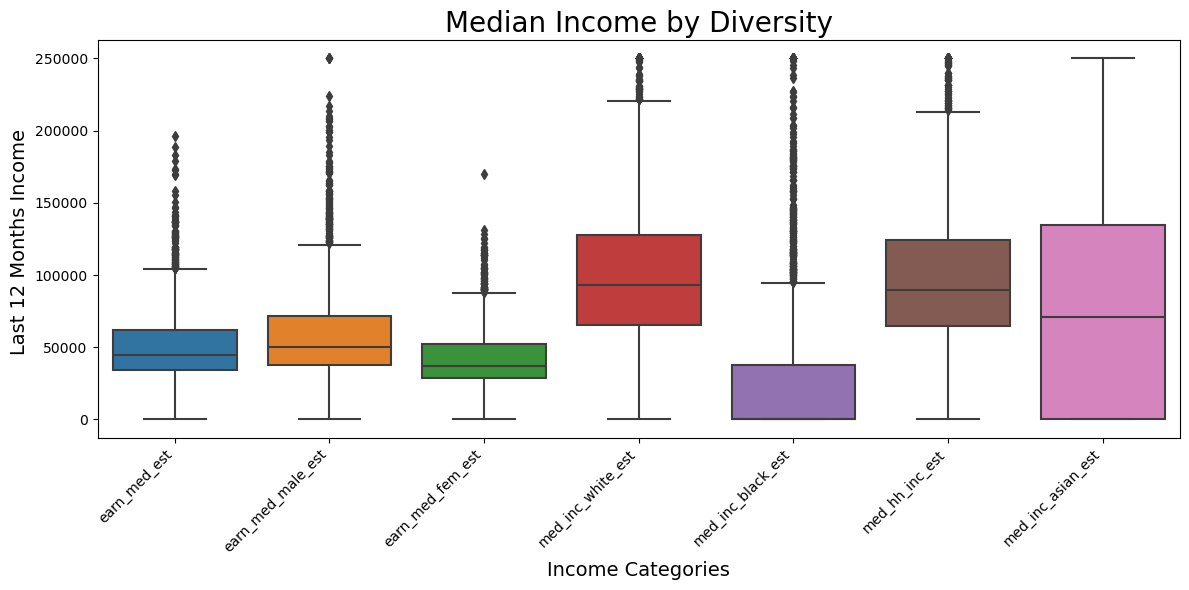

In [81]:
visuals = df_zeros
general_income_mask = ['earn_med_est','earn_med_male_est', 'earn_med_fem_est','med_inc_white_est','med_inc_black_est', 'med_hh_inc_est', 'med_inc_asian_est']
plt.figure(figsize=(12,6))
sns.boxplot(data=visuals[general_income_mask], showfliers=True)


plt.title('Median Income by Diversity', fontsize=20)
plt.xlabel('Income Categories', fontsize=14)
plt.ylabel('Last 12 Months Income ', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [37]:
# sanity check to find the max values of each feature
max_values = visuals[general_income_mask].max()
print(max_values)

earn_med_est         250001
earn_med_male_est    250001
earn_med_fem_est     115788
med_inc_white_est    250001
med_inc_black_est    250001
med_hh_inc_est       250001
med_inc_asian_est    250001
dtype: int64


### Analysis of the Box Plot: "Median Income by Diversity"

The box plot visualizes the distribution of median income across various demographic groups, highlighting income disparities based on gender and race/ethnicity.

### Detailed Observations:

1. **Axes:**
   - **X-Axis (Income Categories):** Represents various demographic groups:
     - `earn_med_est`: Median income for all individuals.
     - `earn_med_male_est`: Median income for males.
     - `earn_med_fem_est`: Median income for females.
     - `med_inc_white_est`: Median income for White individuals.
     - `med_inc_black_est`: Median income for Black individuals.
     - `med_hh_inc_est`: Median income for Hispanic households.
     - `med_inc_asian_est`: Median income for Asian individuals.
   
   - **Y-Axis (Last 12 Months Income):** Shows income levels ranging from $0 to $250,000.

2. **Key Insights:**
   - **Gender Disparities:**
     - Males (`earn_med_male_est`) have a higher median income compared to females (`earn_med_fem_est`), indicating a clear gender income gap.
     - The interquartile range for males is wider, suggesting more variability in male earnings, while the income for females is generally lower and less variable.

   - **Racial and Ethnic Disparities:**
     - **Asian Individuals (`med_inc_asian_est`)**: This group has the highest median income among all demographic groups, with a relatively wide spread indicating significant variability in earnings.
     - **White Individuals (`med_inc_white_est`)**: White individuals also have relatively high median incomes, though slightly lower than Asians, with a large interquartile range reflecting income diversity within this group.
     - **Black Individuals (`med_inc_black_est`)**: This group has the lowest median income among the racial categories, with a narrower range that suggests limited high-income earners compared to other groups.
     - **Hispanic Households (`med_hh_inc_est`)**: Hispanic households show median income that is below White and Asian households but higher than Black individuals, suggesting intermediate income levels.

3. **Income Variability:**
   - **Wide Distribution:** The data shows considerable variability within each demographic, with outliers indicating individuals who earn significantly more than the typical range, especially among males, White, and Asian groups.
   - **Outliers:** There are numerous high-income outliers in most groups, particularly among males and Whites, suggesting that while median incomes are informative, there are notable exceptions where individuals or households earn significantly higher than average.

4. **Comparative Insights:**
   - The plot highlights significant income disparities based on gender, race, and ethnicity. Males earn more than females, and there are clear income hierarchies among racial groups, with Asians and Whites earning more than Hispanics and Blacks.
   - The data underscores persistent economic inequalities that are influenced by both gender and racial/ethnic factors, with Asian individuals showing the highest median earnings and Black individuals showing the lowest.

### Conclusions:

1. **Persistent Gender and Racial Income Gaps:**
   - The data clearly demonstrates ongoing gender and racial income disparities, with males earning more than females and significant differences between racial groups. These gaps highlight the need for targeted policies and initiatives to promote income equity.

2. **Economic Challenges for Black and Hispanic Households:**
   - Black and Hispanic households face lower median incomes, which may reflect broader structural issues such as access to high-paying jobs, education, and economic opportunities. Addressing these disparities is crucial for fostering inclusive economic growth.

3. **High Income Variability Within Groups:**
   - The wide range of incomes, especially among males, Asians, and Whites, suggests that while some individuals achieve high earnings, others within the same demographic groups earn significantly less. This variability underscores the importance of understanding not just median income but also the broader distribution within each group.

4. **Need for Equitable Economic Policies:**
   - The significant disparities in income call for comprehensive policies that address wage inequality, support workforce development, and provide equitable access to economic opportunities across all demographic groups. Such measures are essential to closing income gaps and ensuring that economic growth benefits all communities.

Overall, this analysis highlights the critical need to address income inequality through targeted interventions that consider both gender and racial/ethnic disparities. By focusing on these issues, policymakers can work towards a more equitable economic landscape.

## Income Diversity by Age

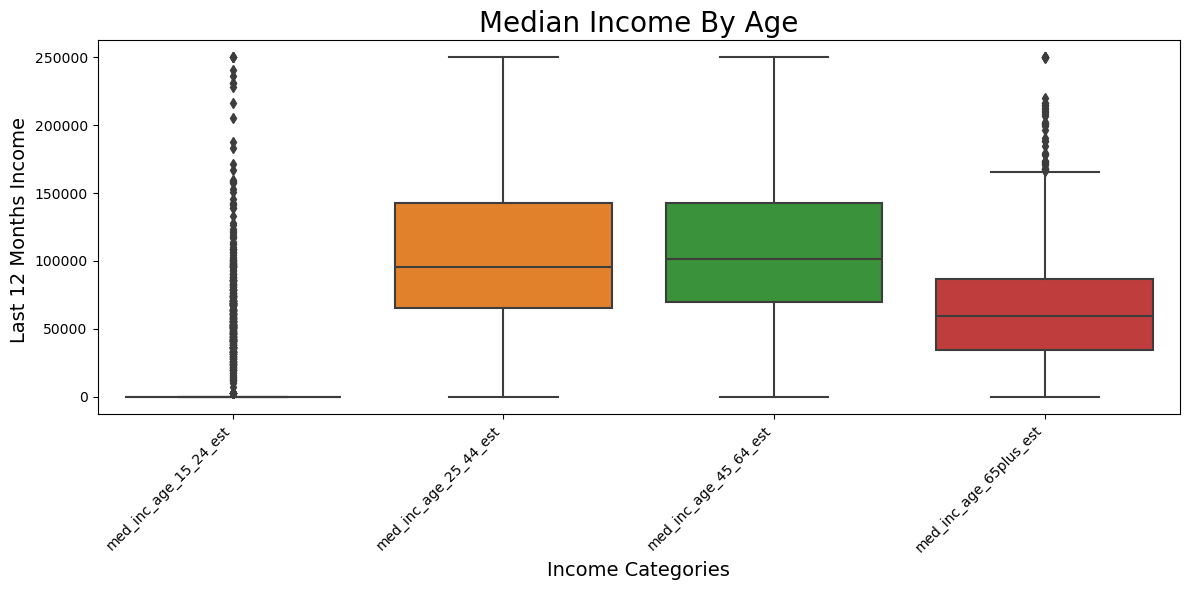

In [85]:
visuals = df_zeros
age_income_mask = ['med_inc_age_15_24_est','med_inc_age_25_44_est','med_inc_age_45_64_est','med_inc_age_65plus_est']
plt.figure(figsize=(12,6))
sns.boxplot(data=visuals[age_income_mask], showfliers=True)


plt.title('Median Income By Age', fontsize=20)
plt.xlabel('Income Categories', fontsize=14)
plt.ylabel('Last 12 Months Income ', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

### Analysis of the Box Plot: "Median Income By Age"

The box plot visualizes the distribution of median income across different age groups, highlighting how income varies at different stages of life.

### Detailed Observations:

1. **Axes:**
   - **X-Axis (Income Categories):** Represents different age groups:
     - `med_inc_age_15_24_est`: Median income for individuals aged 15 to 24.
     - `med_inc_age_25_44_est`: Median income for individuals aged 25 to 44.
     - `med_inc_age_45_64_est`: Median income for individuals aged 45 to 64.
     - `med_inc_age_65plus_est`: Median income for individuals aged 65 and older.
   
   - **Y-Axis (Last 12 Months Income):** Shows income levels ranging from $0 to $250,000.

2. **Key Insights:**
   - **Young Adults (15-24 years):**
     - This age group has the lowest median income among all categories, which is typical for individuals in the early stages of their careers, often working part-time or entry-level jobs.
     - There is a large number of high-income outliers, indicating that while the majority earn lower incomes, some young individuals have significantly higher earnings, possibly due to early career success or specialized high-paying jobs.

   - **Adults (25-44 years):**
     - The median income for this age group is notably higher, reflecting the peak earning years where individuals advance in their careers and attain higher salaries.
     - The interquartile range is broad, indicating substantial variability in earnings, likely driven by differences in education, job experience, and career progression.

   - **Middle-Aged Adults (45-64 years):**
     - This group shows a median income similar to the 25-44 category, with a slightly higher median, reflecting the continuation of peak earning potential during the later stages of career development.
     - The range of incomes remains wide, with many individuals earning well above the median, highlighting the continued financial benefits of career experience and leadership roles.

   - **Seniors (65+ years):**
     - The median income drops significantly for those aged 65 and older, reflecting retirement and reduced reliance on earned income, with most seniors depending on pensions, social security, or savings.
     - The variability in income is narrower compared to the working-age groups, but some high-income outliers suggest that a portion of seniors maintain high earnings, possibly from continued employment, investments, or substantial retirement benefits.

3. **Distribution Patterns:**
   - **Earnings Lifecycle:**
     - The plot highlights the expected lifecycle of earnings, with low income in youth, a steady rise through mid-adulthood, and a decline in retirement years.
     - The broad range of incomes in the 25-64 age groups suggests significant differences in career success and economic outcomes within these categories.

4. **Comparative Insights:**
   - The clear decline in income for the 65+ group underscores the financial transition that occurs in retirement, emphasizing the need for adequate retirement planning.
   - High variability within each age category indicates that factors such as education, career choice, and financial planning significantly impact income levels at different stages of life.

### Conclusions:

1. **Income Peaks in Midlife:**
   - The highest median incomes occur in the 25-64 age range, reflecting peak career stages where individuals benefit most from their education, experience, and professional growth.

2. **Economic Challenges for Young Adults and Seniors:**
   - The lowest median incomes are observed in the 15-24 and 65+ age groups, highlighting the economic challenges faced by young adults entering the workforce and older adults transitioning to retirement.

3. **Significant Income Variability:**
   - The wide range of incomes within each age group, particularly among working-age adults, points to the varying economic outcomes driven by career progression, industry, and personal circumstances.

4. **Importance of Financial Planning:**
   - The marked income decline in retirement years emphasizes the importance of saving and financial planning throughout one's career to ensure economic stability in later life.

Overall, the analysis shows a typical income trajectory across the lifespan, with implications for career development, retirement planning, and targeted support for young and older adults to improve financial security throughout life.

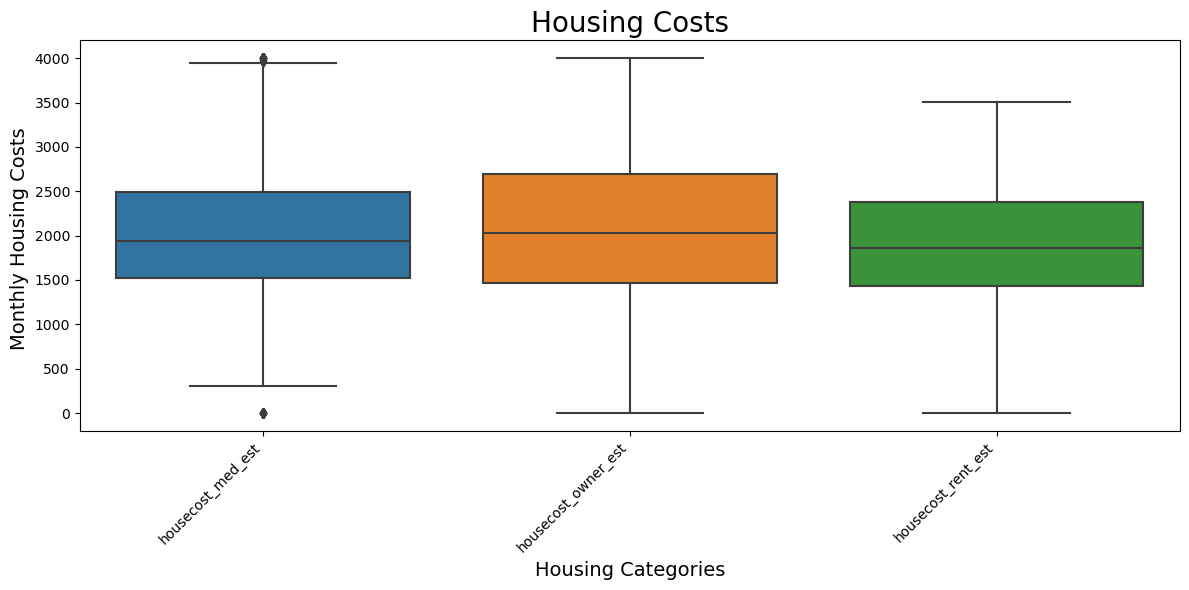

In [89]:
visuals = df_zeros
housing_mask = ['housecost_med_est','housecost_owner_est','housecost_rent_est']
plt.figure(figsize=(12,6))
sns.boxplot(data=visuals[housing_mask], showfliers=True)


plt.title('Housing Costs', fontsize=20)
plt.xlabel('Housing Categories', fontsize=14)
plt.ylabel('Monthly Housing Costs ', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

### Analysis of the Box Plot: "Housing Costs"

### Inital Observations:

1. **Axes:**
   - **X-Axis (Housing Categories):** Represents different categories of housing costs:
     - `housecost_med_est`: Median monthly housing costs for all households.
     - `housecost_owner_est`: Monthly housing costs for owner-occupied homes, including mortgage payments, property taxes, and insurance.
     - `housecost_rent_est`: Monthly housing costs for renter-occupied homes, typically including rent and utility costs.
   
   - **Y-Axis (Monthly Housing Costs):** Ranges from $0 to over $4,000, showing the monthly cost distribution.

2. **Key Insights:**
   - **Overall Housing Costs (`housecost_med_est`):**
     - The median housing cost for all households falls between $1,500 and $2,500, with a broad interquartile range indicating significant variability in overall housing expenses.
     - The spread of costs suggests that while many households pay within this range, there are households at both lower and higher ends of the cost spectrum.
     - Outliers at the upper range indicate some households face exceptionally high housing costs, possibly due to larger properties, high mortgage rates, or living in expensive areas.

   - **Owner-Occupied Housing Costs (`housecost_owner_est`):**
     - This category shows the highest median monthly cost among the three groups, highlighting that owning a home, including mortgage and other associated expenses, is generally more expensive than renting.
     - The interquartile range is wide, reflecting diverse costs associated with ownership, such as variations in mortgage payments, property taxes, and maintenance.
     - There are no significant outliers on the lower end, suggesting that housing costs for owners rarely drop below a baseline due to fixed expenses like property taxes.

   - **Renter-Occupied Housing Costs (`housecost_rent_est`):**
     - Renting is the least expensive category, with the median monthly cost slightly lower than that of the overall housing costs.
     - The spread is narrower compared to the owner category, indicating that rental costs are more consistent across different renters, although still showing some variability due to differences in property type, location, and included amenities.
     - There are no extreme outliers, reflecting a more predictable cost structure for renters compared to owners.

3. **Distribution Patterns:**
   - **Cost Variability:** 
     - Owner-occupied housing shows the most variability, reflecting the wide range of home prices, mortgage rates, and associated costs across different markets.
     - Rental costs, while lower, still exhibit some variability, indicating that renters face a range of price points based on market conditions, location, and property type.

4. **Comparative Insights:**
   - The plot clearly shows that owning a home generally incurs higher monthly costs than renting, but also comes with a broader range of expenses. This could influence housing decisions based on financial capacity and long-term investment considerations.
   - For many households, renting remains a more affordable option, especially in areas where property values and associated ownership costs are high.

5. **Implications:**
   - The data emphasizes the financial burden of homeownership, which can be particularly challenging in high-cost areas.
   - Understanding these cost dynamics can inform housing policies, financial planning, and support programs aimed at reducing housing cost burdens, especially for first-time homebuyers and low-income renters.

### Summary:
This box plot illustrates the distribution of housing costs across different household types, highlighting the generally higher and more variable costs associated with owning a home compared to renting. The data underscores the importance of affordable housing initiatives and supports the need for tailored financial planning to help households manage their housing expenses effectively.

### Conclusions from the Box Plot Analysis: "Housing Costs"

1. **Homeownership is Generally More Expensive:**
   - Owner-occupied housing costs (`housecost_owner_est`) are the highest among the categories analyzed, reflecting the additional financial responsibilities of owning a home, such as mortgage payments, property taxes, and maintenance costs.
   - The wide range in costs for homeowners highlights significant variability influenced by factors such as property location, home size, and market conditions.

2. **Renting is More Affordable but Still Variable:**
   - Renter-occupied housing costs (`housecost_rent_est`) are lower and more consistent than ownership costs, making renting a more predictable and generally more affordable option for many households.
   - Despite being the least expensive, rental costs still vary significantly, suggesting that market factors, location, and property type can affect rent levels.

3. **Overall Housing Cost Variability:**
   - The variability in median housing costs for all households (`housecost_med_est`) indicates that housing affordability is a broad issue, with some households facing significantly higher costs than others.
   - Outliers on the higher end for all categories suggest that certain households are experiencing extreme housing costs, likely driven by market dynamics or specific personal circumstances.

4. **Implications for Housing Policy:**
   - The data underscores the need for housing policies that address the financial burden of homeownership, especially for middle-income and first-time homebuyers who may struggle with high costs.
   - Efforts to control rental prices, expand affordable rental options, and support renters in high-cost areas are critical to maintaining accessible housing markets.

5. **Importance of Financial Planning:**
   - For prospective homeowners, understanding the full scope of ownership costs is crucial for long-term financial stability. This includes not just mortgage payments but also property taxes, insurance, and maintenance.
   - Renters, while generally facing lower costs, still need to be aware of potential rent increases and seek stable, affordable housing options.

6. **Targeted Support for High-Cost Burden Households:**
   - The presence of high-cost outliers indicates a segment of the population facing unsustainable housing costs. Targeted support, such as subsidies, tax breaks, or financial counseling, could help alleviate these burdens.

### Overall Conclusion:
This analysis highlights significant differences in housing costs between renting and owning, with ownership generally being more costly and variable. These findings emphasize the need for comprehensive housing policies that promote affordability, stability, and financial accessibility across the spectrum of housing choices. Addressing these challenges can help create a more equitable housing market that meets the needs of diverse households.


## Testing out GEOID using census data provided by US government

Providing maps for some of our data visualizations may prove to be helpful for some of the upcoming challenges, in addition to other visualizations other contributors will provide. In order to ensure that our data GEOID fields are valid, I obtained publicly available tract files for data mapping at https://data.census.gov/

### Simple Visualization of GEOID Data

Before committing to providing possible map solutions to some of the challenges, lets confirm that the data provided can be used by using GEO Pandas to plot a simple tract from one Florida county.

In [96]:
#path to shapefile
shapefile_path = 'tl_2020_12001_tract10.shp'
#reading in shapfile using GeoPandas
tracts = gpd.read_file(shapefile_path)
#testing with GEOID selected from df.head()
# Print all column names to verify
print("Columns in the shapefile:", tracts.columns.tolist())
test_tract = tracts[tracts['GEOID10'] == '12001000700']
# Check if the tract exists
if test_tract.empty:
    print("GEOID not found in the shapefile.")
else:
    # Display information about the tract
    print(test_tract)

Columns in the shapefile: ['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry']
   STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10    NAMELSAD10 MTFCC10  \
10        12        001    000700  12001000700      7  Census Tract   G5020   

   FUNCSTAT10   ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
10          S  22417196    457315  +29.6280432  -082.2957817   

                                             geometry  
10  POLYGON ((-82.32755 29.63571, -82.32729 29.636...  


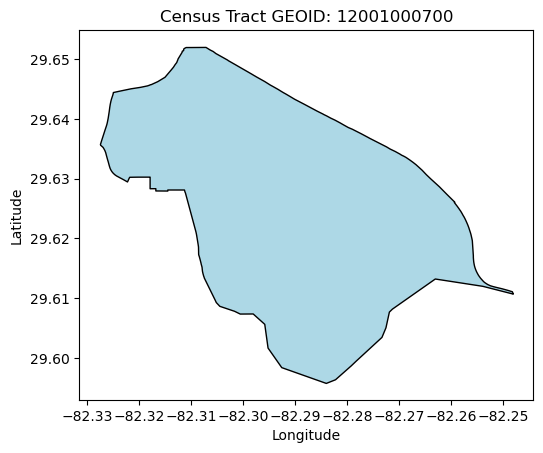

In [98]:
# Plot the specific Census Tract
test_tract.plot(edgecolor='black', color='lightblue')
plt.title('Census Tract GEOID: 12001000700')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()